In [1]:
include("../src/models.jl")
include("../src/special.jl")
include("../src/solvers.jl")

using Plots; pyplot()
using JLD
using Logging

In [2]:
@info("Loading OIST...")
oist_mc = load("../data/oist_mc.jld")
Ξ_oist = oist_mc["Xi_mc"]
X_oist = oist_mc["X_mc"]
Q_oist = oist_mc["Q_mc"]

@info("Loading Oja...")
oja_mc = load("../data/oja_mc.jld")
Ξ_oja = oja_mc["Xi_mc"]
X_oja = oja_mc["X_mc"]
Q_oja = oja_mc["Q_mc"];

┌ Info: Loading OIST...
└ @ Main In[2]:1
┌ Info: Loading Oja...
└ @ Main In[2]:7


In [3]:
p = 1000
N = 120
ω = 1.0
ρ = 0.05
τ = 0.5
β = 0.27
T = 15
σ = 1.0
ts = Array{Float64}(0:T*p) / p;

# Change of Cosine Similarity

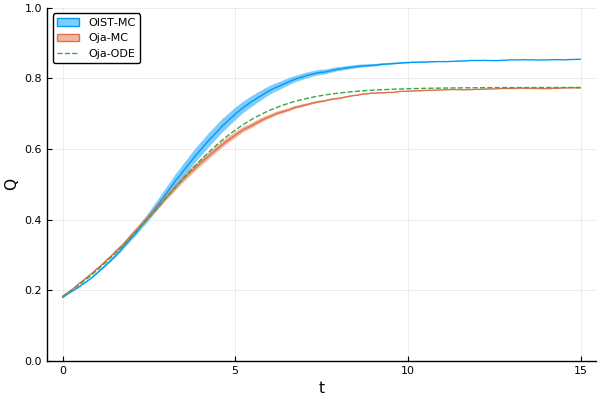

In [4]:
plt = plot(ts, mean(Q_oist, dims=1)[1, :], ribbon=var(Q_oist, dims=1)[1, :], label="OIST-MC")
plot!(plt, ts, mean(Q_oja, dims=1)[1, :], ribbon=var(Q_oja, dims=1)[1, :], label="Oja-MC")

Q₀ = Float64(mean(Q_oja[:, 1]))
plot!(plt, ts, ode(ts, Q₀, τ, ω), label="Oja-ODE", linestyle=:dash)
ylims!(0, 1)
xlabel!("t")
ylabel!("Q")

# Histograms and PDE results of $P(x|\xi)$

In [5]:
zero_idxs = findall(Ξ_oist .== 0)
X_zeros = permutedims(X_oist, [1, 3, 2])[zero_idxs, :]

sparse_idxs = findall(Ξ_oist .> 0)
X_sparse = permutedims(X_oist, [1, 3, 2])[sparse_idxs, :];

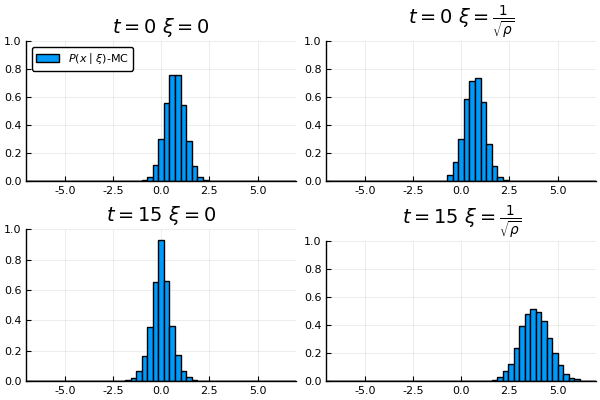

In [82]:
l = @layout [a b; c d]
bins = LinRange(-7, 7, 50)

p11 = histogram(X_zeros[:, 1], normed=true, bins=bins, title=L"t=0" * " " * L"\xi=0", label=L"P(x \mid \xi)"*"-MC")
p12 = histogram(X_sparse[:, 1], normed=true, bins=bins, title=L"t=0" * " " * L"\xi=\frac{1}{\sqrt{\rho}}", label="")

p21 = histogram(X_zeros[:, end], normed=true, bins=bins, title=L"t=15" * " " * L"\xi=0", label="")
p22 = histogram(X_sparse[:, end], normed=true, bins=bins, title=L"t=15" * " " * L"\xi=\frac{1}{\sqrt{\rho}}",
                label="")

plot(p11, p12, p21, p22, legend=:topleft)
ylims!(0, 1)
xlims!(-7, 7)

In [37]:
using LaTeXStrings